In [1135]:
# Run reviews_exploratiion.ipynb first.
import pandas as pd
import json
import ast
import numpy as np
import math
import missingno as msno
from dateutil import parser
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [1090]:
# Prevent printing scientific notation for latex tables.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [1091]:
# Load the reviews data.
games_reviews_long_df = pd.read_csv('games_reviews_flat.csv')
games_reviews_long_df.head()

,Unnamed: 0,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,opencritic_name,...,percentile,firstReleaseDate,firstReviewDate,latestReviewDate,variable,igdb_company_id,developer,publisher,stock_id,date
0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,83.00000,2016-12-06T00:00:00.000Z,2016-12-05T00:00:00.000Z,2017-09-10T04:00:00.000Z,pub1_stock_id,10100,False,True,JP3435000009,2016-12-05
1,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,20.00000,2020-12-01T00:00:00.000Z,2020-11-30T00:00:00.000Z,2023-02-01T00:00:00.000Z,pub1_stock_id,517,False,True,SE0008294953,2020-11-30
2,2508,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,dev1_stock_id,161,True,False,JP3300200007,2019-09-10
3,2510,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,pub1_stock_id,161,False,True,JP3300200007,2019-09-10
4,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,False,One Punch Man: A Hero Nobody Knows,One-Punch Man: A Hero Nobody Knows,...,14.00000,2020-02-28T00:00:00.000Z,2017-05-21T00:00:00.000Z,2020-07-13T00:00:00.000Z,pub1_stock_id,248,False,True,JP3778630008,2020-02-27


<Axes: >

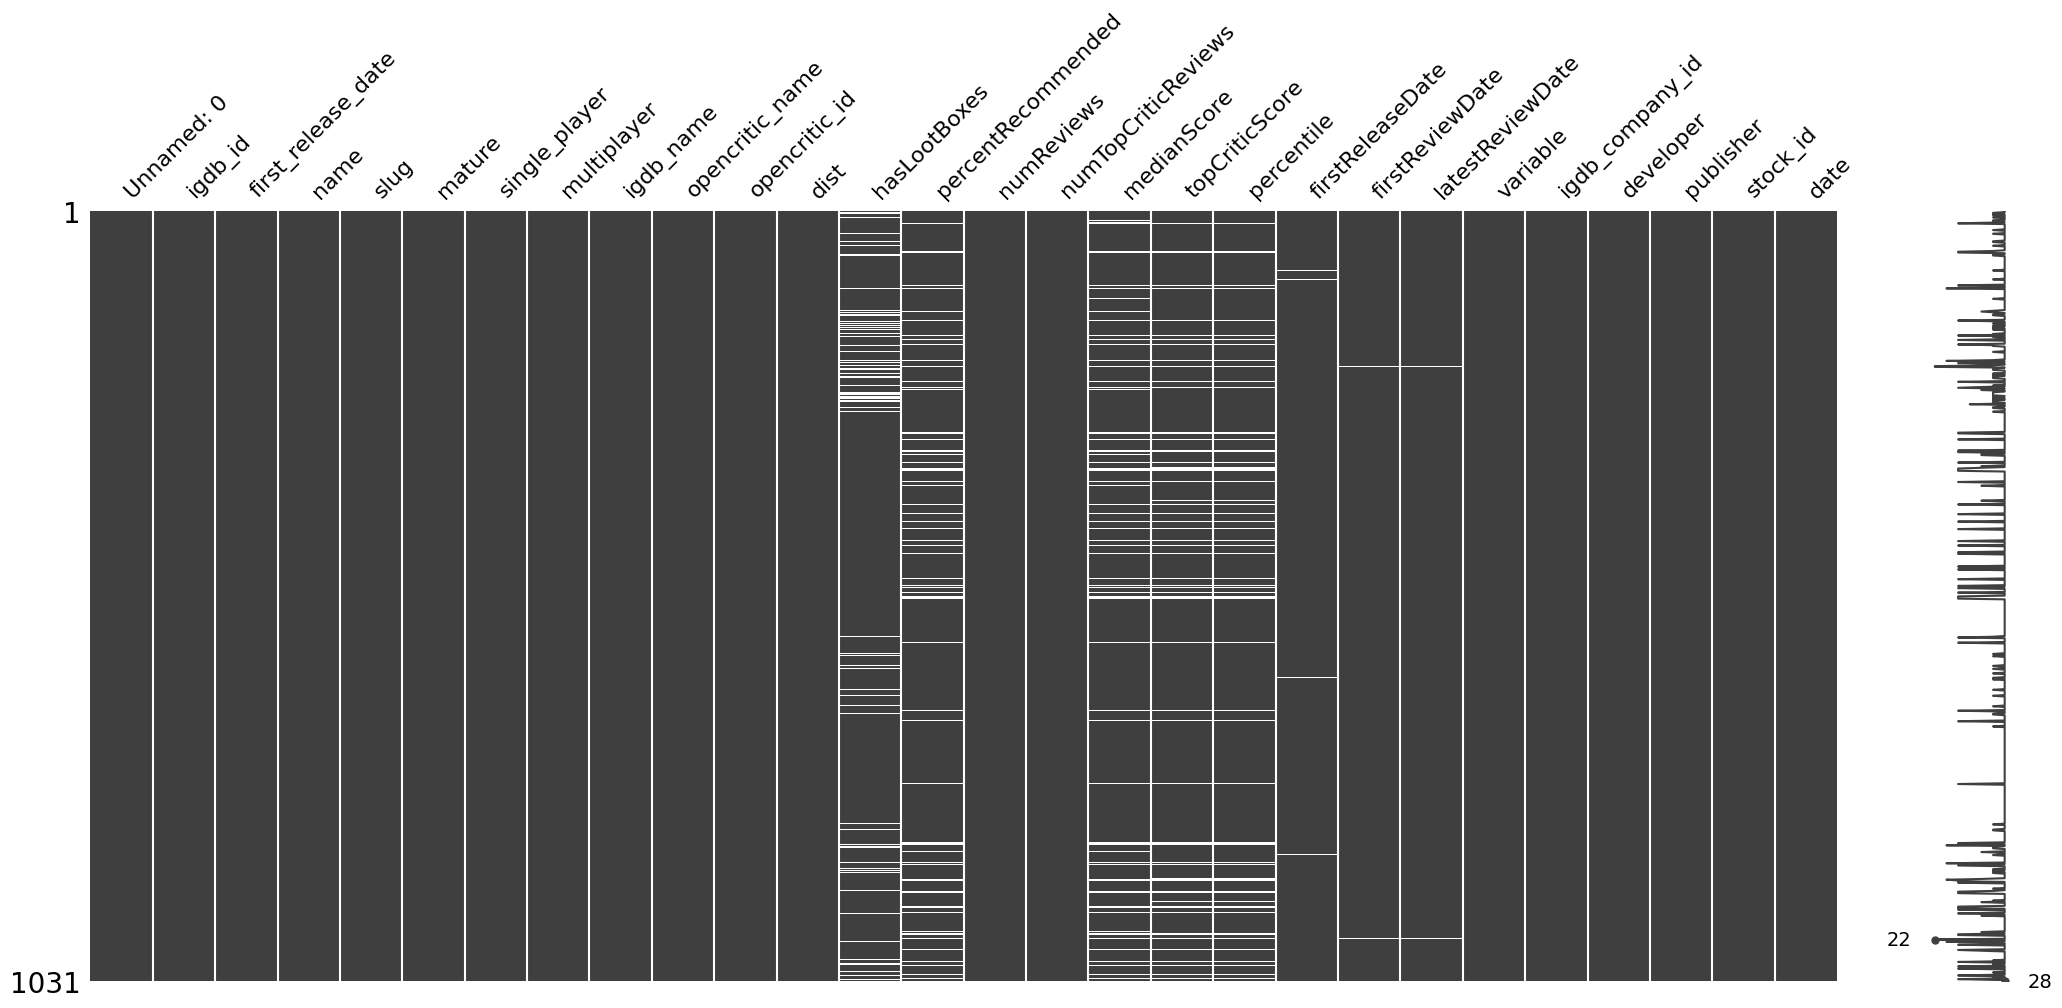

In [1092]:
# Plot missing data.
%matplotlib inline

msno.matrix(games_reviews_long_df)

In [1093]:
games_reviews_long_df.columns

Index(['Unnamed: 0', 'igdb_id', 'first_release_date', 'name', 'slug', 'mature',
       'single_player', 'multiplayer', 'igdb_name', 'opencritic_name',
       'opencritic_id', 'dist', 'hasLootBoxes', 'percentRecommended',
       'numReviews', 'numTopCriticReviews', 'medianScore', 'topCriticScore',
       'percentile', 'firstReleaseDate', 'firstReviewDate', 'latestReviewDate',
       'variable', 'igdb_company_id', 'developer', 'publisher', 'stock_id',
       'date'],
      dtype='object')

In [1094]:
# stock_id is object and needs to be parsed as a string.
games_reviews_long_df['stock_id'] = games_reviews_long_df['stock_id'].astype('string')

In [1095]:
# Parse first release date as datetime.
games_reviews_long_df['date'] = pd.to_datetime(games_reviews_long_df['date'], format='%Y-%m-%d')

In [1096]:
games_reviews_long_df.dtypes

Unnamed: 0                      int64
igdb_id                         int64
first_release_date             object
name                           object
slug                           object
mature                           bool
single_player                    bool
multiplayer                      bool
igdb_name                      object
opencritic_name                object
opencritic_id                   int64
dist                          float64
hasLootBoxes                   object
percentRecommended            float64
numReviews                    float64
numTopCriticReviews           float64
medianScore                   float64
topCriticScore                float64
percentile                    float64
firstReleaseDate               object
firstReviewDate                object
latestReviewDate               object
variable                       object
igdb_company_id                 int64
developer                        bool
publisher                        bool
stock_id    

In [1097]:
games_reviews_long_df.head()

,Unnamed: 0,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,opencritic_name,...,percentile,firstReleaseDate,firstReviewDate,latestReviewDate,variable,igdb_company_id,developer,publisher,stock_id,date
0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,83.00000,2016-12-06T00:00:00.000Z,2016-12-05T00:00:00.000Z,2017-09-10T04:00:00.000Z,pub1_stock_id,10100,False,True,JP3435000009,2016-12-05
1,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,20.00000,2020-12-01T00:00:00.000Z,2020-11-30T00:00:00.000Z,2023-02-01T00:00:00.000Z,pub1_stock_id,517,False,True,SE0008294953,2020-11-30
2,2508,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,dev1_stock_id,161,True,False,JP3300200007,2019-09-10
3,2510,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,pub1_stock_id,161,False,True,JP3300200007,2019-09-10
4,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,False,One Punch Man: A Hero Nobody Knows,One-Punch Man: A Hero Nobody Knows,...,14.00000,2020-02-28T00:00:00.000Z,2017-05-21T00:00:00.000Z,2020-07-13T00:00:00.000Z,pub1_stock_id,248,False,True,JP3778630008,2020-02-27


In [1098]:
# Create date column from first_release_date for joining
games_reviews_long_df['date'] = games_reviews_long_df['first_release_date']

# # Parse first release date as datetime.
# games_reviews_long_df['date'] = pd.to_datetime(games_reviews_long_df['date'],unit='s', format='%Y-%m-%d')
games_reviews_long_df.dtypes

Unnamed: 0                      int64
igdb_id                         int64
first_release_date             object
name                           object
slug                           object
mature                           bool
single_player                    bool
multiplayer                      bool
igdb_name                      object
opencritic_name                object
opencritic_id                   int64
dist                          float64
hasLootBoxes                   object
percentRecommended            float64
numReviews                    float64
numTopCriticReviews           float64
medianScore                   float64
topCriticScore                float64
percentile                    float64
firstReleaseDate               object
firstReviewDate                object
latestReviewDate               object
variable                       object
igdb_company_id                 int64
developer                        bool
publisher                        bool
stock_id    

In [1099]:
games_reviews_long_df.head()

,Unnamed: 0,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,opencritic_name,...,percentile,firstReleaseDate,firstReviewDate,latestReviewDate,variable,igdb_company_id,developer,publisher,stock_id,date
0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,83.00000,2016-12-06T00:00:00.000Z,2016-12-05T00:00:00.000Z,2017-09-10T04:00:00.000Z,pub1_stock_id,10100,False,True,JP3435000009,2016-12-06
1,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,20.00000,2020-12-01T00:00:00.000Z,2020-11-30T00:00:00.000Z,2023-02-01T00:00:00.000Z,pub1_stock_id,517,False,True,SE0008294953,2020-11-30
2,2508,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,dev1_stock_id,161,True,False,JP3300200007,2019-09-10
3,2510,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,pub1_stock_id,161,False,True,JP3300200007,2019-09-10
4,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,False,One Punch Man: A Hero Nobody Knows,One-Punch Man: A Hero Nobody Knows,...,14.00000,2020-02-28T00:00:00.000Z,2017-05-21T00:00:00.000Z,2020-07-13T00:00:00.000Z,pub1_stock_id,248,False,True,JP3778630008,2020-02-27


In [1100]:
# Load the financial data.
stock_ff_index_df = pd.read_csv('financial_data_clean.csv')
stock_ff_index_df.head()

,Unnamed: 0,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,1.00839,FR0000054470,...,-0.29000,0.52000,0.24000,-0.11000,0.22000,0.00000,308.80000,NaN,NaN,NaN
1,1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,1.00839,FR0000054470,...,0.93000,-0.36000,0.14000,-0.25000,0.22000,0.00000,310.56000,-0.01439,0.00570,-0.02009
2,2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,1.00839,FR0000054470,...,2.37000,-1.31000,0.43000,-0.20000,0.06000,0.00000,319.53000,0.01102,0.02888,-0.01787
3,3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,1.00839,FR0000054470,...,1.33000,-0.10000,0.66000,0.04000,0.05000,0.00000,321.06000,0.08417,0.00479,0.07938
4,4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,1.00839,FR0000054470,...,-0.07000,0.07000,1.52000,-0.54000,0.56000,0.00000,319.89000,0.01106,-0.00364,0.01470


In [1101]:
stock_ff_index_df.columns

Index(['Unnamed: 0', 'gvkey', 'iid', 'date', 'company_name',
       'shares_outstanding', 'trading_volume', 'closing_price',
       'total_return_factor', 'stock_id', 'eu', 'jp', 'us', 'mkt-rf', 'smb',
       'hml', 'rmw', 'cma', 'rf', 'benchmark_price', 'returns',
       'benchmark_returns', 'excess_return'],
      dtype='object')

In [1102]:
# stock_id is object and needs to be parsed as a string.
stock_ff_index_df['stock_id'] = stock_ff_index_df['stock_id'].astype('string')

In [1103]:
# Convert stock_data_df date column to datetime.
stock_ff_index_df['date'] = pd.to_datetime(stock_ff_index_df['date'])
stock_ff_index_df.dtypes

Unnamed: 0                      int64
gvkey                           int64
iid                            object
date                   datetime64[ns]
company_name                   object
shares_outstanding            float64
trading_volume                float64
closing_price                 float64
total_return_factor           float64
stock_id               string[python]
eu                               bool
jp                               bool
us                               bool
mkt-rf                        float64
smb                           float64
hml                           float64
rmw                           float64
cma                           float64
rf                            float64
benchmark_price               float64
returns                       float64
benchmark_returns             float64
excess_return                 float64
dtype: object

In [1104]:
stock_ff_index_df.head()

,Unnamed: 0,gvkey,iid,date,company_name,shares_outstanding,trading_volume,closing_price,total_return_factor,stock_id,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,0,212596,01W,2015-10-01,UBI SOFT ENTERTAINMENT SA,111218465.00000,506501.00000,18.42000,1.00839,FR0000054470,...,-0.29000,0.52000,0.24000,-0.11000,0.22000,0.00000,308.80000,NaN,NaN,NaN
1,1,212596,01W,2015-10-02,UBI SOFT ENTERTAINMENT SA,111218465.00000,217260.00000,18.15500,1.00839,FR0000054470,...,0.93000,-0.36000,0.14000,-0.25000,0.22000,0.00000,310.56000,-0.01439,0.00570,-0.02009
2,2,212596,01W,2015-10-05,UBI SOFT ENTERTAINMENT SA,111218465.00000,267647.00000,18.35500,1.00839,FR0000054470,...,2.37000,-1.31000,0.43000,-0.20000,0.06000,0.00000,319.53000,0.01102,0.02888,-0.01787
3,3,212596,01W,2015-10-06,UBI SOFT ENTERTAINMENT SA,111218465.00000,984676.00000,19.90000,1.00839,FR0000054470,...,1.33000,-0.10000,0.66000,0.04000,0.05000,0.00000,321.06000,0.08417,0.00479,0.07938
4,4,212596,01W,2015-10-07,UBI SOFT ENTERTAINMENT SA,111218465.00000,740257.00000,20.12000,1.00839,FR0000054470,...,-0.07000,0.07000,1.52000,-0.54000,0.56000,0.00000,319.89000,0.01106,-0.00364,0.01470


Begin by joining the reviews dataset with the financial dataset on release date and stock_id.

In [1105]:
# Convert both dfs date columns to the same type.
stock_ff_index_df['date'] = pd.to_datetime(stock_ff_index_df['date'])
games_reviews_long_df['date'] = pd.to_datetime(games_reviews_long_df['date'])
# games_reviews_long_df['firstReviewDate'] = pd.to_datetime(games_reviews_long_df['firstReviewDate'], format="%Y-%m-%d")
# stock_ff_index_df.date = stock_ff_index_df['date'].astype('string')
# games_reviews_long_df.date = games_reviews_long_df['date'].astype('string')
# games_reviews_long_df.date = games_reviews_long_df['firstReviewDate'].astype('string')



In [1106]:
games_reviews_long_df.dtypes

Unnamed: 0                      int64
igdb_id                         int64
first_release_date             object
name                           object
slug                           object
mature                           bool
single_player                    bool
multiplayer                      bool
igdb_name                      object
opencritic_name                object
opencritic_id                   int64
dist                          float64
hasLootBoxes                   object
percentRecommended            float64
numReviews                    float64
numTopCriticReviews           float64
medianScore                   float64
topCriticScore                float64
percentile                    float64
firstReleaseDate               object
firstReviewDate                object
latestReviewDate               object
variable                       object
igdb_company_id                 int64
developer                        bool
publisher                        bool
stock_id    

In [1107]:
games_reviews_long_df.head()

,Unnamed: 0,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,opencritic_name,...,percentile,firstReleaseDate,firstReviewDate,latestReviewDate,variable,igdb_company_id,developer,publisher,stock_id,date
0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,83.00000,2016-12-06T00:00:00.000Z,2016-12-05T00:00:00.000Z,2017-09-10T04:00:00.000Z,pub1_stock_id,10100,False,True,JP3435000009,2016-12-06
1,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,20.00000,2020-12-01T00:00:00.000Z,2020-11-30T00:00:00.000Z,2023-02-01T00:00:00.000Z,pub1_stock_id,517,False,True,SE0008294953,2020-11-30
2,2508,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,dev1_stock_id,161,True,False,JP3300200007,2019-09-10
3,2510,119422,2019-09-10,eFootball PES 2020,efootball-pes-2020,False,True,False,eFootball PES 2020,eFootball PES 2020,...,83.00000,2019-09-10T00:00:00.000Z,2019-09-09T04:00:00.000Z,2019-10-09T00:00:00.000Z,pub1_stock_id,161,False,True,JP3300200007,2019-09-10
4,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,False,One Punch Man: A Hero Nobody Knows,One-Punch Man: A Hero Nobody Knows,...,14.00000,2020-02-28T00:00:00.000Z,2017-05-21T00:00:00.000Z,2020-07-13T00:00:00.000Z,pub1_stock_id,248,False,True,JP3778630008,2020-02-27


In [1108]:
games_reviews_returns_df = pd.merge(games_reviews_long_df, stock_ff_index_df, how='left', on=['date', 'stock_id'])
games_reviews_returns_df.head()

,Unnamed: 0_x,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,opencritic_name,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return
0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,0.49000,-0.09000,1.07000,-0.27000,0.14000,0.00000,1394.21000,-0.00773,0.00176,-0.00949
1,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,0.49000,-0.09000,1.07000,-0.27000,0.14000,0.00000,1394.21000,-0.00772,0.00176,-0.00949
2,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,0.49000,-0.09000,1.07000,-0.27000,0.14000,0.00000,1394.21000,0.01166,-0.00398,0.01564
3,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,-1.10000,0.47000,-1.31000,0.02000,-0.63000,0.00000,575.44000,0.03451,-0.00260,0.03711
4,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,-1.10000,0.47000,-1.31000,0.02000,-0.63000,0.00000,575.44000,0.08465,-0.00260,0.08725


In [1109]:
games_reviews_returns_df.shape

(1319, 49)

<Axes: >

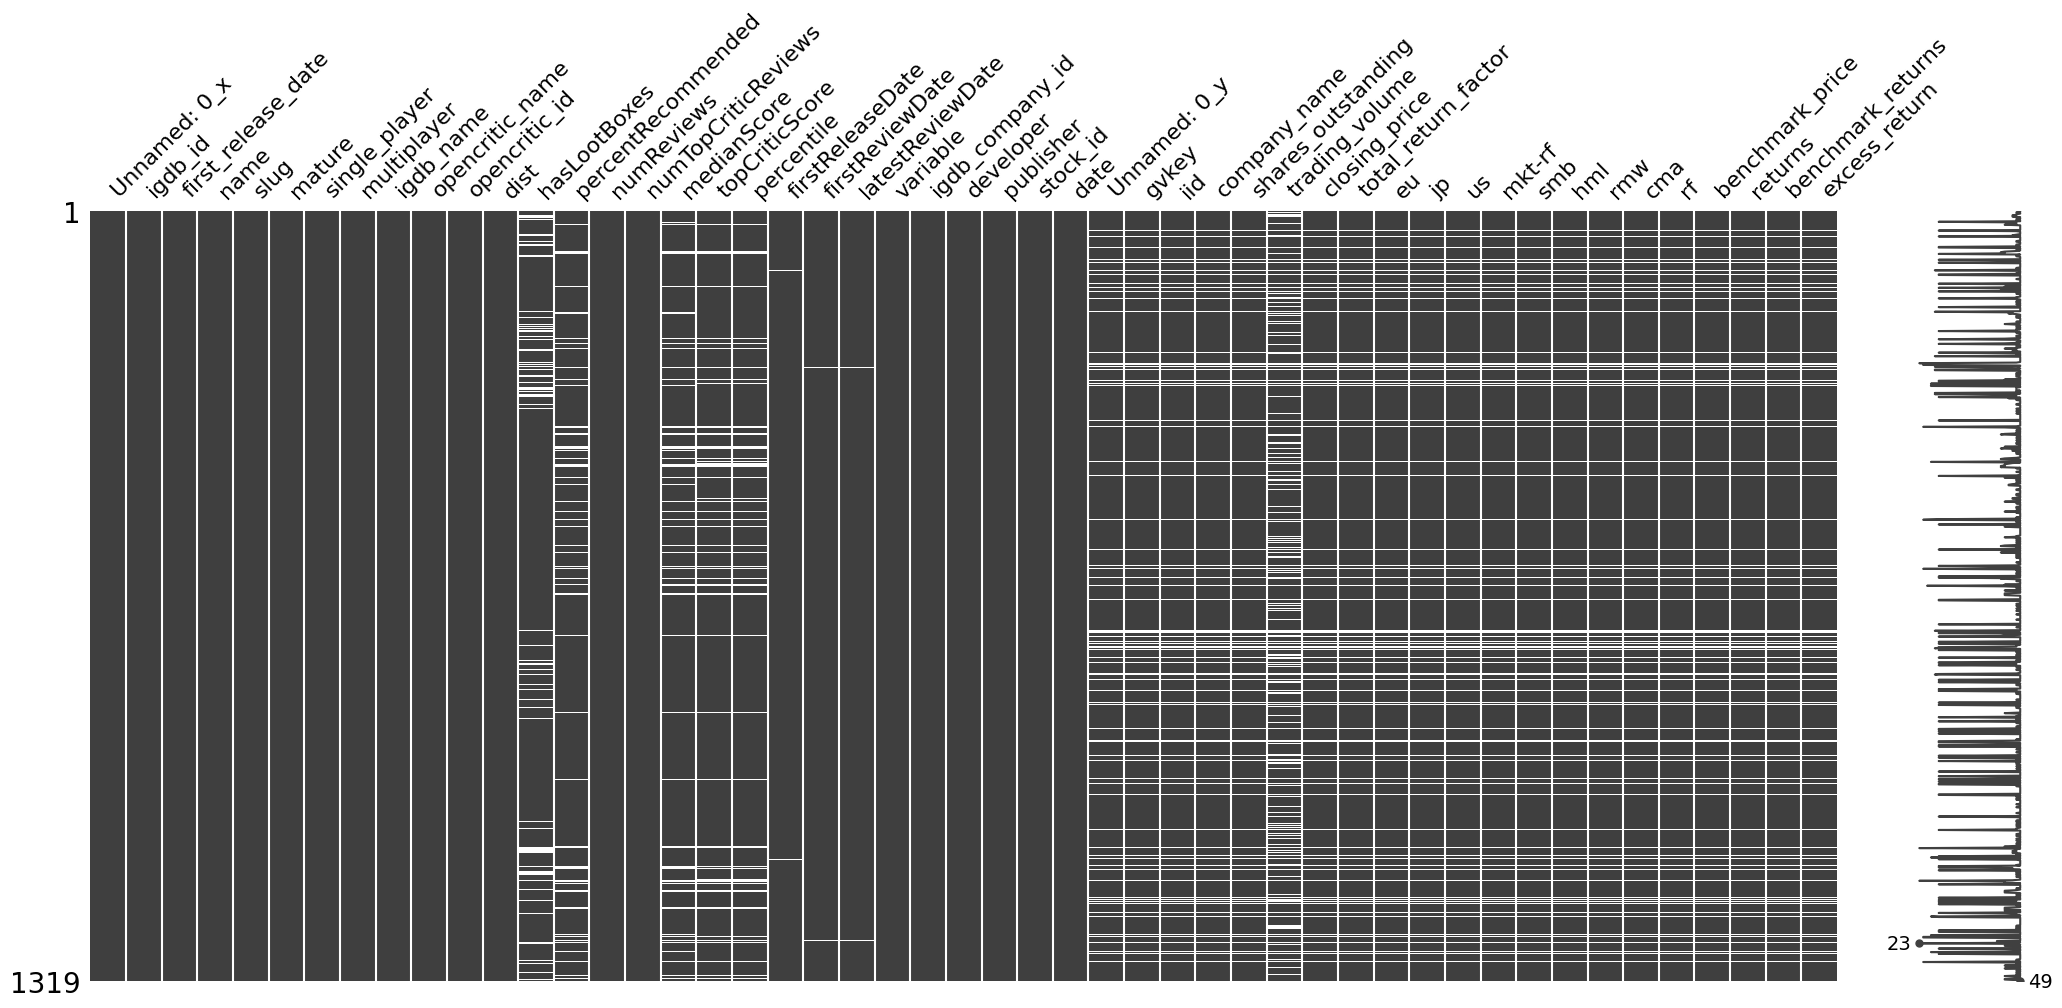

In [1110]:
# Plot missing data.
%matplotlib inline

msno.matrix(games_reviews_returns_df)

In [1111]:
games_reviews_returns_df = games_reviews_returns_df.dropna()

<Axes: >

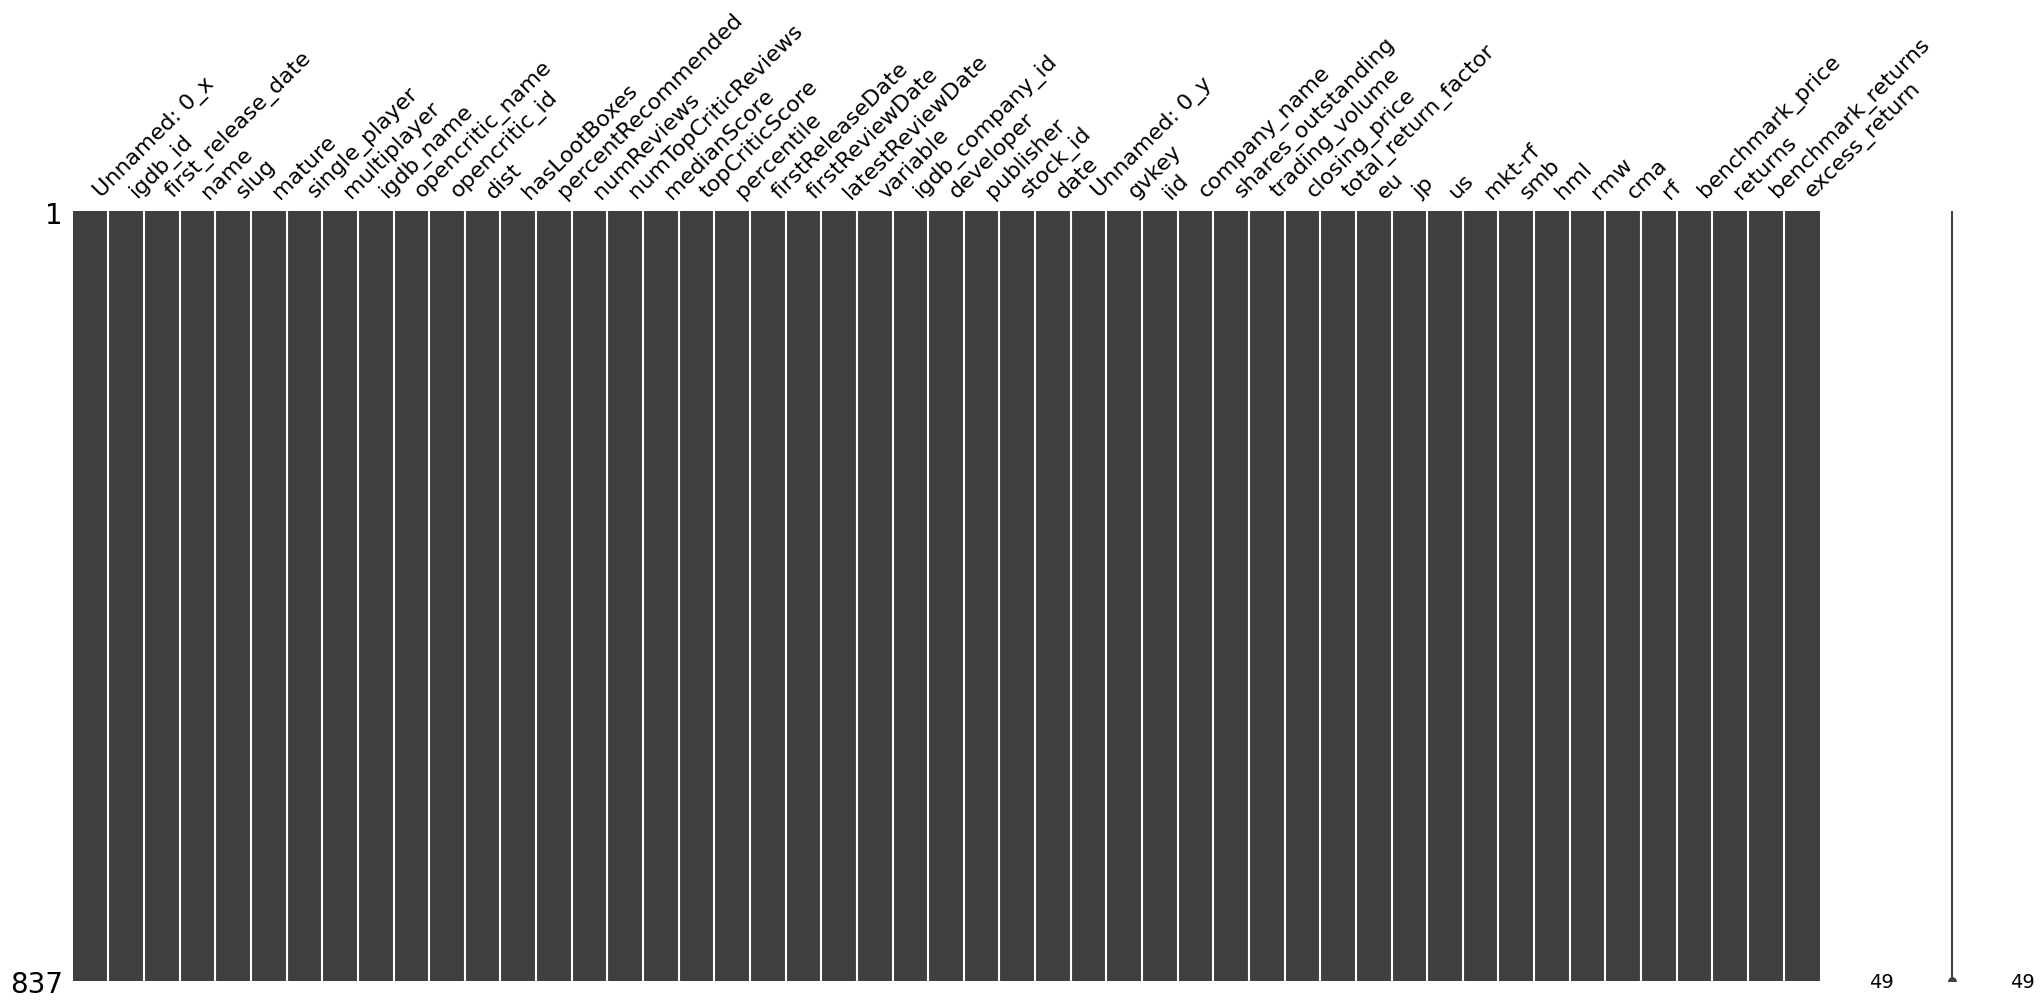

In [1112]:
# Plot missing data.
%matplotlib inline

msno.matrix(games_reviews_returns_df)

In [1113]:
# Add in a market capitalization column.
games_reviews_returns_df['market_cap'] = games_reviews_returns_df['shares_outstanding'] * games_reviews_returns_df['closing_price']


In [1114]:
games_reviews_returns_df.columns

Index(['Unnamed: 0_x', 'igdb_id', 'first_release_date', 'name', 'slug',
       'mature', 'single_player', 'multiplayer', 'igdb_name',
       'opencritic_name', 'opencritic_id', 'dist', 'hasLootBoxes',
       'percentRecommended', 'numReviews', 'numTopCriticReviews',
       'medianScore', 'topCriticScore', 'percentile', 'firstReleaseDate',
       'firstReviewDate', 'latestReviewDate', 'variable', 'igdb_company_id',
       'developer', 'publisher', 'stock_id', 'date', 'Unnamed: 0_y', 'gvkey',
       'iid', 'company_name', 'shares_outstanding', 'trading_volume',
       'closing_price', 'total_return_factor', 'eu', 'jp', 'us', 'mkt-rf',
       'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price', 'returns',
       'benchmark_returns', 'excess_return', 'market_cap'],
      dtype='object')

In [1115]:
games_reviews_returns_df.describe()[[
    'dist',
    'percentRecommended',
    'numReviews',
    'numTopCriticReviews',
    'medianScore',
    'topCriticScore',
    ]].style.format({'D':'{:0.5f}'},precision=5).to_latex('games_descriptive_stats.tex')

In [1116]:
games_reviews_returns_df.describe()[[
    'market_cap',
    'trading_volume',
    'mkt-rf',
    'smb',
    'hml',
    'rmw',
    'cma',
    'rf',
    'returns',
    'benchmark_returns',
    'excess_return'
    ]].style.format({'D':'{:0.5f}'},precision=5).to_latex('companies_descriptive_stats.tex')

In [1117]:
games_reviews_returns_df.to_csv('games_returns_release_date.csv')

In [ ]:
names = ['single_player', 'multiplayer', 'hasLootBoxes', 'developer', 'publisher', 'eu', 'jp', 'us']
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [1118]:
# Count the number of games.
games_reviews_returns_df.shape[0]

837

In [1119]:
# Count the number of eu companies.
games_reviews_returns_df[games_reviews_returns_df['eu'] == True].shape[0]

262

In [1120]:
# Count the number of jp companies.
games_reviews_returns_df[games_reviews_returns_df['jp'] == True].shape[0]

516

In [1131]:
games_reviews_returns_df.dtypes

Unnamed: 0_x                    int64
igdb_id                         int64
first_release_date             object
name                           object
slug                           object
mature                           bool
single_player                    bool
multiplayer                      bool
igdb_name                      object
opencritic_name                object
opencritic_id                   int64
dist                          float64
hasLootBoxes                   object
percentRecommended            float64
numReviews                    float64
numTopCriticReviews           float64
medianScore                   float64
topCriticScore                float64
percentile                    float64
firstReleaseDate               object
firstReviewDate                object
latestReviewDate               object
variable                       object
igdb_company_id                 int64
developer                        bool
publisher                        bool
stock_id    

In [1133]:
def add_region_name(eu_bool, jp_bool, us_bool):
    if eu_bool:
        return 'eu'
    elif jp_bool:
        return 'jp'
    else:
        return 'us'

In [1134]:
games_reviews_returns_df['region'] = games_reviews_returns_df.apply(lambda x: add_region_name(eu_bool=x['eu'], jp_bool=x['jp'], us_bool=x['us']), axis=1)
games_reviews_returns_df.head()

,Unnamed: 0_x,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,opencritic_name,...,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return,market_cap,region
0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,1.07000,-0.27000,0.14000,0.00000,1394.21000,-0.00773,0.00176,-0.00949,4029599578400.00000,jp
1,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,The Last Guardian,...,1.07000,-0.27000,0.14000,0.00000,1394.21000,-0.00772,0.00176,-0.00949,32925239188.40000,jp
3,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,-1.31000,0.02000,-0.63000,0.00000,575.44000,0.03451,-0.00260,0.03711,27857280000.00000,eu
4,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,Empire of Sin,...,-1.31000,0.02000,-0.63000,0.00000,575.44000,0.08465,-0.00260,0.08725,2760384000.00000,eu
10,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,False,One Punch Man: A Hero Nobody Knows,One-Punch Man: A Hero Nobody Knows,...,0.56000,-0.49000,0.33000,0.01000,1480.58000,-0.00593,-0.00455,-0.00138,1254300000000.00000,jp


/Users/connor.stevens/.pyenv/versions/3.11.1/envs/venv-thesis/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/connor.stevens/.pyenv/versions/3.11.1/envs/venv-thesis/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/connor.stevens/.pyenv/versions/3.11.1/envs/venv-thesis/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/connor.stevens/.pyenv/versions/3.11.1/envs/venv-thesis/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


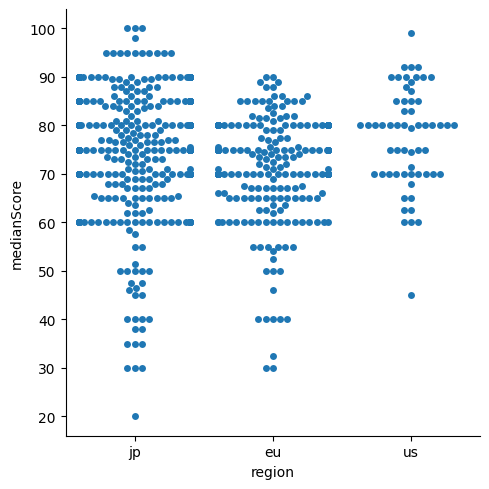

In [1137]:
sns.catplot(data=games_reviews_returns_df, x="region", y="medianScore", kind="swarm")

In [1130]:
df_test = games_reviews_returns_df.groupby(['eu']).cumcount()
df_test.head()

0     0
1     1
3     0
4     1
10    2
dtype: int64